In [112]:
%pylab inline
import pandas as pd
def p2f(x): 
    if x.startswith('<'):
        return 0.001
    return float(x.strip('%'))/100

def pie (df, y, axis=None, figsize=(5,5)):
    p = df.plot.pie(y=y, ax=axis, legend=True, labels=None, figsize=figsize)
    p.set_ylabel('')
    return p

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'pie']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [103]:
cas = pd.read_csv('ca-market-share-2016.csv', sep="\t",names=['rank', 'name', 'usage', 'market share'], converters={'market share':p2f, 'usage': p2f})
cas = cas.drop('rank', axis=1)
cas.index = cas['name']
cas.head()

,name,usage,market share
name,,,
Comodo,Comodo,0.081,0.406
Symantec,Symantec,0.052,0.260
GoDaddy,GoDaddy,0.024,0.118
GlobalSign,GlobalSign,0.019,0.097
IdenTrust,IdenTrust,0.007,0.035


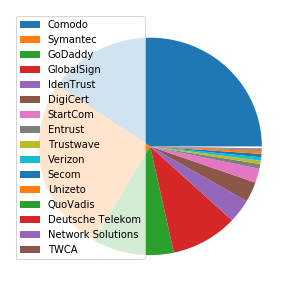

In [113]:
pie(cas, 'market share')

In [62]:
browsers = pd.read_csv('browser-market-share-2016.csv', sep="\t", converters={'December':p2f})
browsers.index = browsers['Browser']

browsers.head()

,Browser,November,December,change,Sha-1 certs?
Browser,,,,,
IE (all),IE (all),15.45%,0.1516,-0.29%,No announced plans to block SHA-1 certs
IE11,IE11,10.40%,0.1026,-0.14%,No announced plans to block SHA-1 certs
IE10,IE10,1.44%,0.0137,-0.07%,No announced plans to block SHA-1 certs
IE9,IE9,1.48%,0.0144,-0.04%,No announced plans to block SHA-1 certs
IE6/7/8,IE6/7/8,2.13%,0.0209,-0.04%,No announced plans to block SHA-1 certs


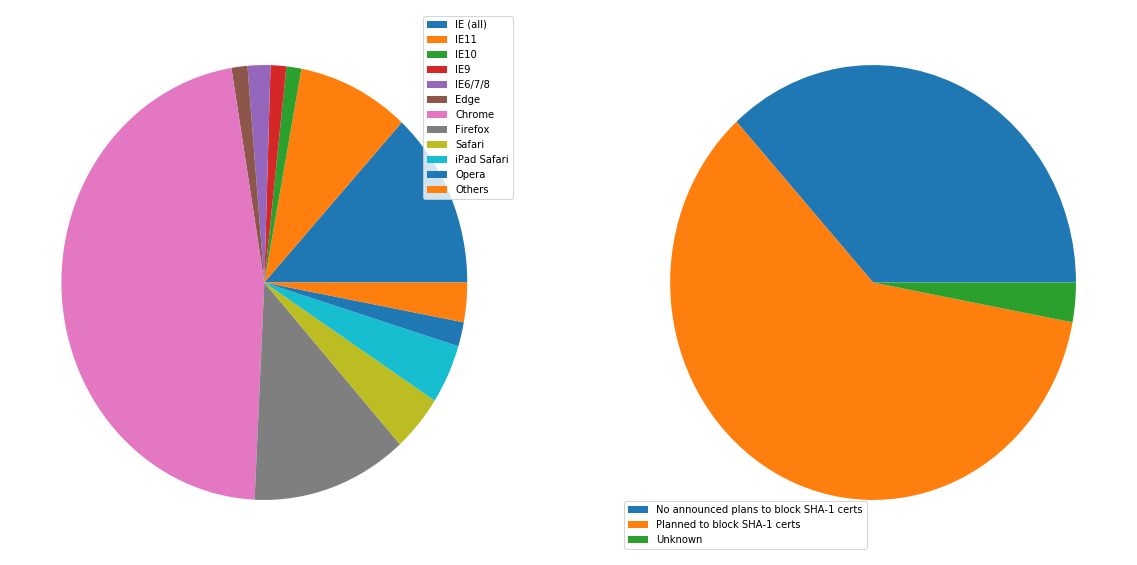

In [114]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(ncols=2)
pie(browsers, 'December', axarr[0])
pie(browsers.groupby('Sha-1 certs?').sum(), 'December', axarr[1], figsize=(20,10))